In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
#import the countries data from the csv file with an index column of countries
df_jan = pd.read_csv("Feb13_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_jan['timestamp'] = pd.to_datetime(df_jan['timestamp'])
df_jan = df_jan.resample('H', on ='timestamp', axis=0).mean()
df_jan.head()


Chan_0_1   Chan_0_2   Chan_1_2
timestamp                                           
2024-02-13 17:00:00  59.641026  41.384615  61.820513
2024-02-13 18:00:00  59.283333  41.616667  61.333333
2024-02-13 19:00:00  57.333333  40.866667  60.066667
2024-02-13 20:00:00  59.016667  41.483333  61.400000
2024-02-13 21:00:00  57.766667  41.433333  61.483333

In [69]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').mean()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_jan, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

Chan_0_1   Chan_0_2   Chan_1_2  Outdoor_Temperature  \
timestamp                                                                   
2024-02-13 17:00:00  59.641026  41.384615  61.820513            52.700000   
2024-02-13 18:00:00  59.283333  41.616667  61.333333            50.666667   
2024-02-13 19:00:00  57.333333  40.866667  60.066667            48.891667   
2024-02-13 20:00:00  59.016667  41.483333  61.400000            47.325000   
2024-02-13 21:00:00  57.766667  41.433333  61.483333            45.250000   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-02-13 17:00:00    4.008333   4.858333            14.8      301.000000   
2024-02-13 18:00:00    2.150000   2.725000            14.8      289.916667   
2024-02-13 19:00:00    1.241667   1.566667            14.8      265.833333   
2024-02-13 20:00:00    0.333333   0.558333            14.8      242.500000   
2024-02-13 21:00:00    0.591667   0.916667            14.8      240.083333   

                     Hourly_Rain_(in/hr)  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                                       
2024-02-13 17:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 18:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 19:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 20:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 21:00:00                  0.0        0.00         0.0         3.11   

                     Monthly_Rain  Yearly_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                  
2024-02-13 17:00:00          3.72        77.51                 29.970833   
2024-02-13 18:00:00          3.72        77.51                 30.000000   
2024-02-13 19:00:00          3.72        77.51                 30.025000   
2024-02-13 20:00:00          3.72        77.51                 30.041667   
2024-02-13 21:00:00          3.72        77.51                 30.050000   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-02-13 17:00:00     37.750000                           0.0   
2024-02-13 18:00:00     41.916667                           0.0   
2024-02-13 19:00:00     47.000000                           0.0   
2024-02-13 20:00:00     50.500000                           0.0   
2024-02-13 21:00:00     55.333333                           0.0   

                     Solar_Radiation_(W/m^2)  Avg_Wind_Direction  \
timestamp                                                          
2024-02-13 17:00:00                15.341667           29.005833   
2024-02-13 18:00:00                 2.033333           29.033333   
2024-02-13 19:00:00                 0.000000           29.058333   
2024-02-13 20:00:00                 0.000000           29.072500   
2024-02-13 21:00:00                 0.000000           29.084167   

                     Absolute_Pressure_(inHg)  
timestamp                                      
2024-02-13 17:00:00                       1.0  
2024-02-13 18:00:00                       1.0  
2024-02-13 19:00:00                       1.0  
2024-02-13 20:00:00                       1.0  
2024-02-13 21:00:00                       1.0

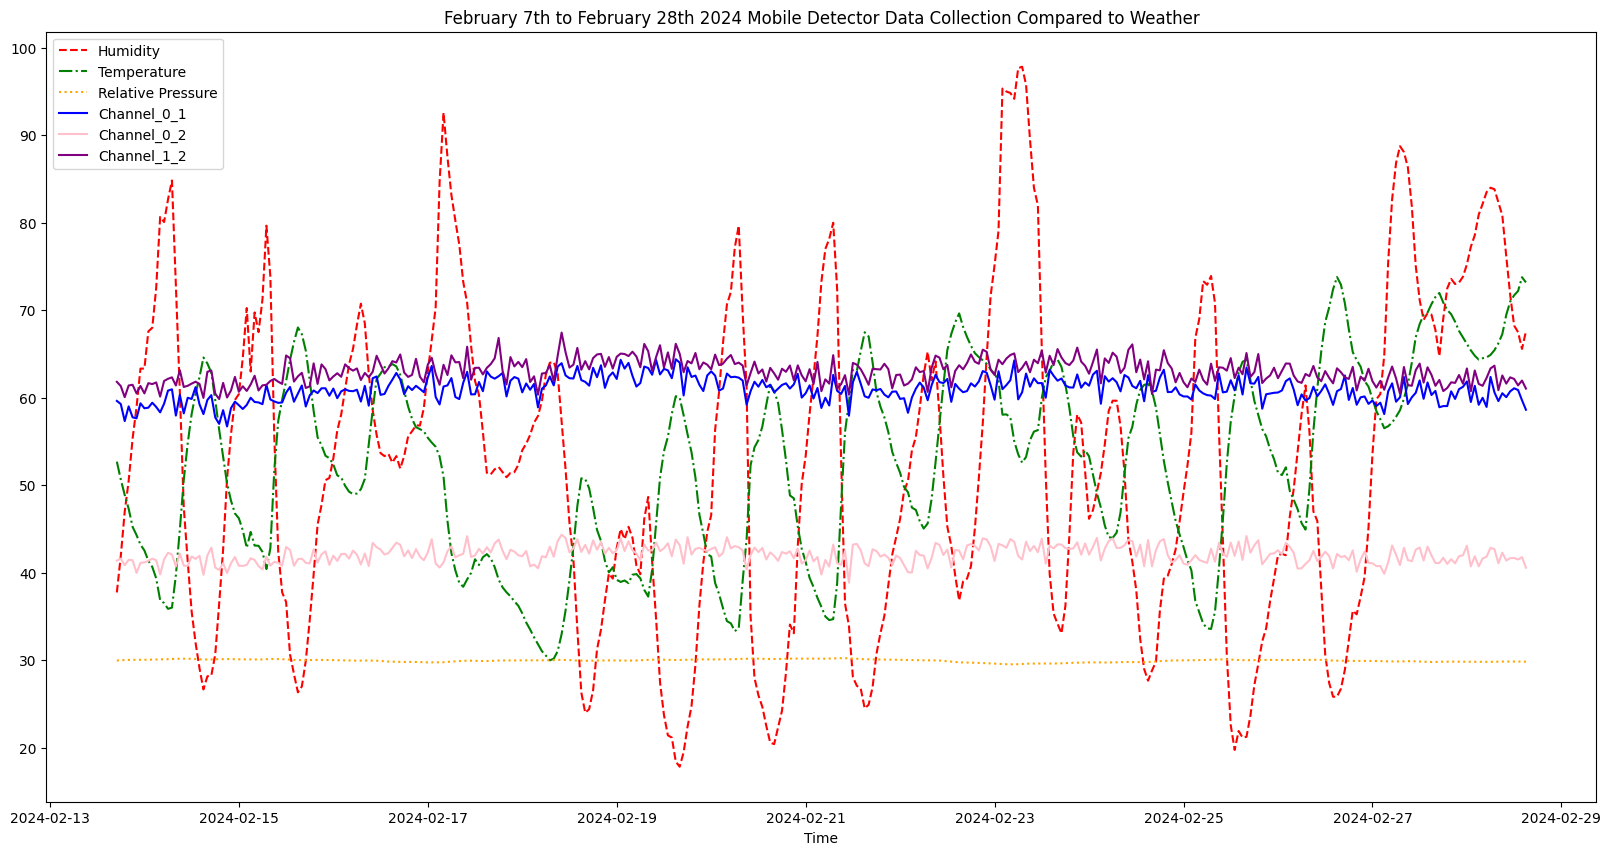

In [70]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 28th 2024 Mobile Detector Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


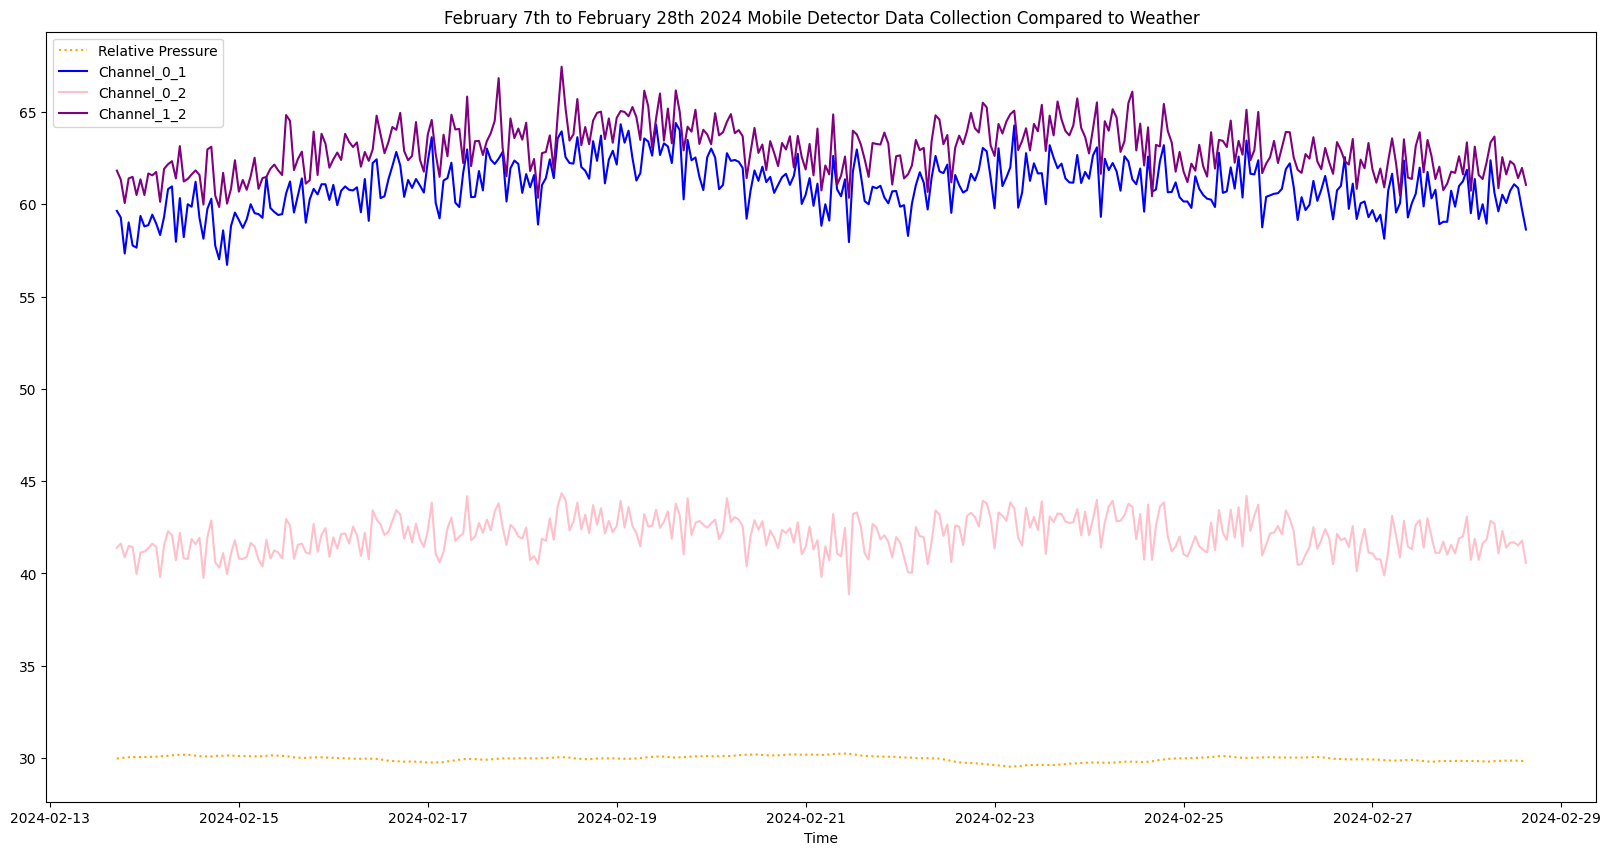

In [71]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 28th 2024 Mobile Detector Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


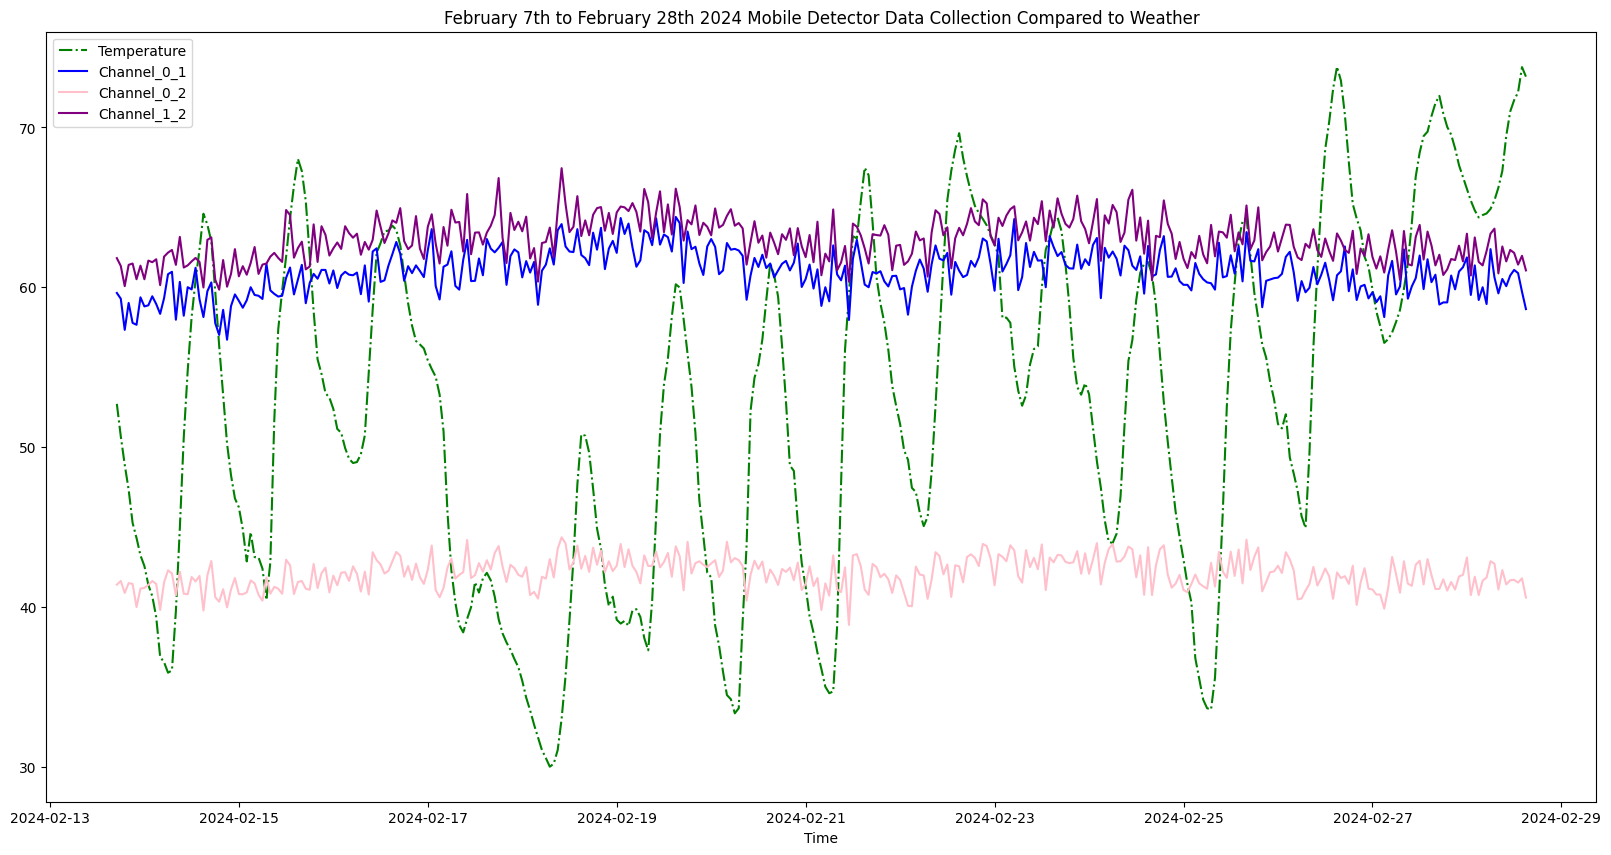

In [72]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 28th 2024 Mobile Detector Data Collection Compared to Weather')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


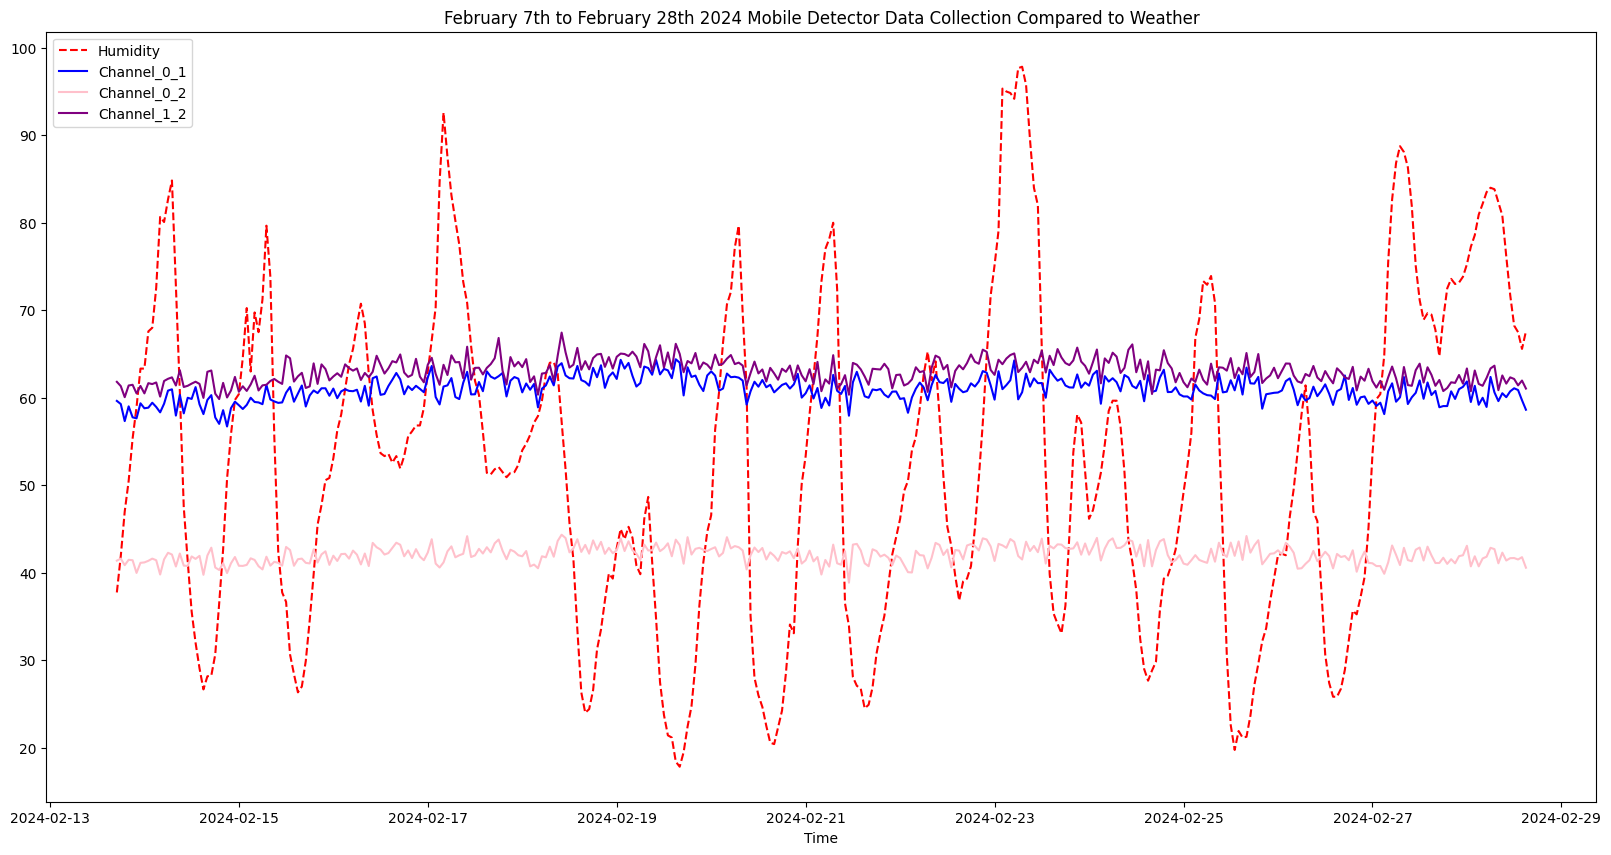

In [73]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 28th 2024 Mobile Detector Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [74]:
#make zero mean and unit variance
df_scaled_zmuv = df_combined.copy()
df_scaled_zmuv['Chan_0_1'] = (df_scaled_zmuv['Chan_0_1'] - df_scaled_zmuv['Chan_0_1'].mean()) / df_scaled_zmuv['Chan_0_1'].std()
df_scaled_zmuv['Chan_0_2'] = (df_scaled_zmuv['Chan_0_2'] - df_scaled_zmuv['Chan_0_2'].mean()) / df_scaled_zmuv['Chan_0_2'].std()
df_scaled_zmuv['Chan_1_2'] = (df_scaled_zmuv['Chan_1_2'] - df_scaled_zmuv['Chan_1_2'].mean()) / df_scaled_zmuv['Chan_1_2'].std()
df_scaled_zmuv['Humidity_(%)'] = (df_scaled_zmuv['Humidity_(%)'] - df_scaled_zmuv['Humidity_(%)'].mean()) / df_scaled_zmuv['Humidity_(%)'].std()
df_scaled_zmuv['Outdoor_Temperature'] = (df_scaled_zmuv['Outdoor_Temperature'] - df_scaled_zmuv['Outdoor_Temperature'].mean()) / df_scaled_zmuv['Outdoor_Temperature'].std()
df_scaled_zmuv['Relative_Pressure_(inHg)'] = (df_scaled_zmuv['Relative_Pressure_(inHg)'] - df_scaled_zmuv['Relative_Pressure_(inHg)'].mean()) / df_scaled_zmuv['Relative_Pressure_(inHg)'].std()
df_scaled_zmuv.head()

Chan_0_1  Chan_0_2  Chan_1_2  Outdoor_Temperature  \
timestamp                                                                
2024-02-13 17:00:00 -0.957333 -0.704242 -0.859244             0.007308   
2024-02-13 18:00:00 -1.213463 -0.470135 -1.214144            -0.179186   
2024-02-13 19:00:00 -2.609787 -1.226778 -2.136883            -0.341986   
2024-02-13 20:00:00 -1.404413 -0.604650 -1.165579            -0.485678   
2024-02-13 21:00:00 -2.299493 -0.655092 -1.104872            -0.675994   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-02-13 17:00:00    4.008333   4.858333            14.8      301.000000   
2024-02-13 18:00:00    2.150000   2.725000            14.8      289.916667   
2024-02-13 19:00:00    1.241667   1.566667            14.8      265.833333   
2024-02-13 20:00:00    0.333333   0.558333            14.8      242.500000   
2024-02-13 21:00:00    0.591667   0.916667            14.8      240.083333   

                     Hourly_Rain_(in/hr)  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                                       
2024-02-13 17:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 18:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 19:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 20:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 21:00:00                  0.0        0.00         0.0         3.11   

                     Monthly_Rain  Yearly_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                  
2024-02-13 17:00:00          3.72        77.51                  0.053773   
2024-02-13 18:00:00          3.72        77.51                  0.244571   
2024-02-13 19:00:00          3.72        77.51                  0.408112   
2024-02-13 20:00:00          3.72        77.51                  0.517139   
2024-02-13 21:00:00          3.72        77.51                  0.571653   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-02-13 17:00:00     -0.783982                           0.0   
2024-02-13 18:00:00     -0.562773                           0.0   
2024-02-13 19:00:00     -0.292897                           0.0   
2024-02-13 20:00:00     -0.107081                           0.0   
2024-02-13 21:00:00      0.149521                           0.0   

                     Solar_Radiation_(W/m^2)  Avg_Wind_Direction  \
timestamp                                                          
2024-02-13 17:00:00                15.341667           29.005833   
2024-02-13 18:00:00                 2.033333           29.033333   
2024-02-13 19:00:00                 0.000000           29.058333   
2024-02-13 20:00:00                 0.000000           29.072500   
2024-02-13 21:00:00                 0.000000           29.084167   

                     Absolute_Pressure_(inHg)  
timestamp                                      
2024-02-13 17:00:00                       1.0  
2024-02-13 18:00:00                       1.0  
2024-02-13 19:00:00                       1.0  
2024-02-13 20:00:00                       1.0  
2024-02-13 21:00:00                       1.0

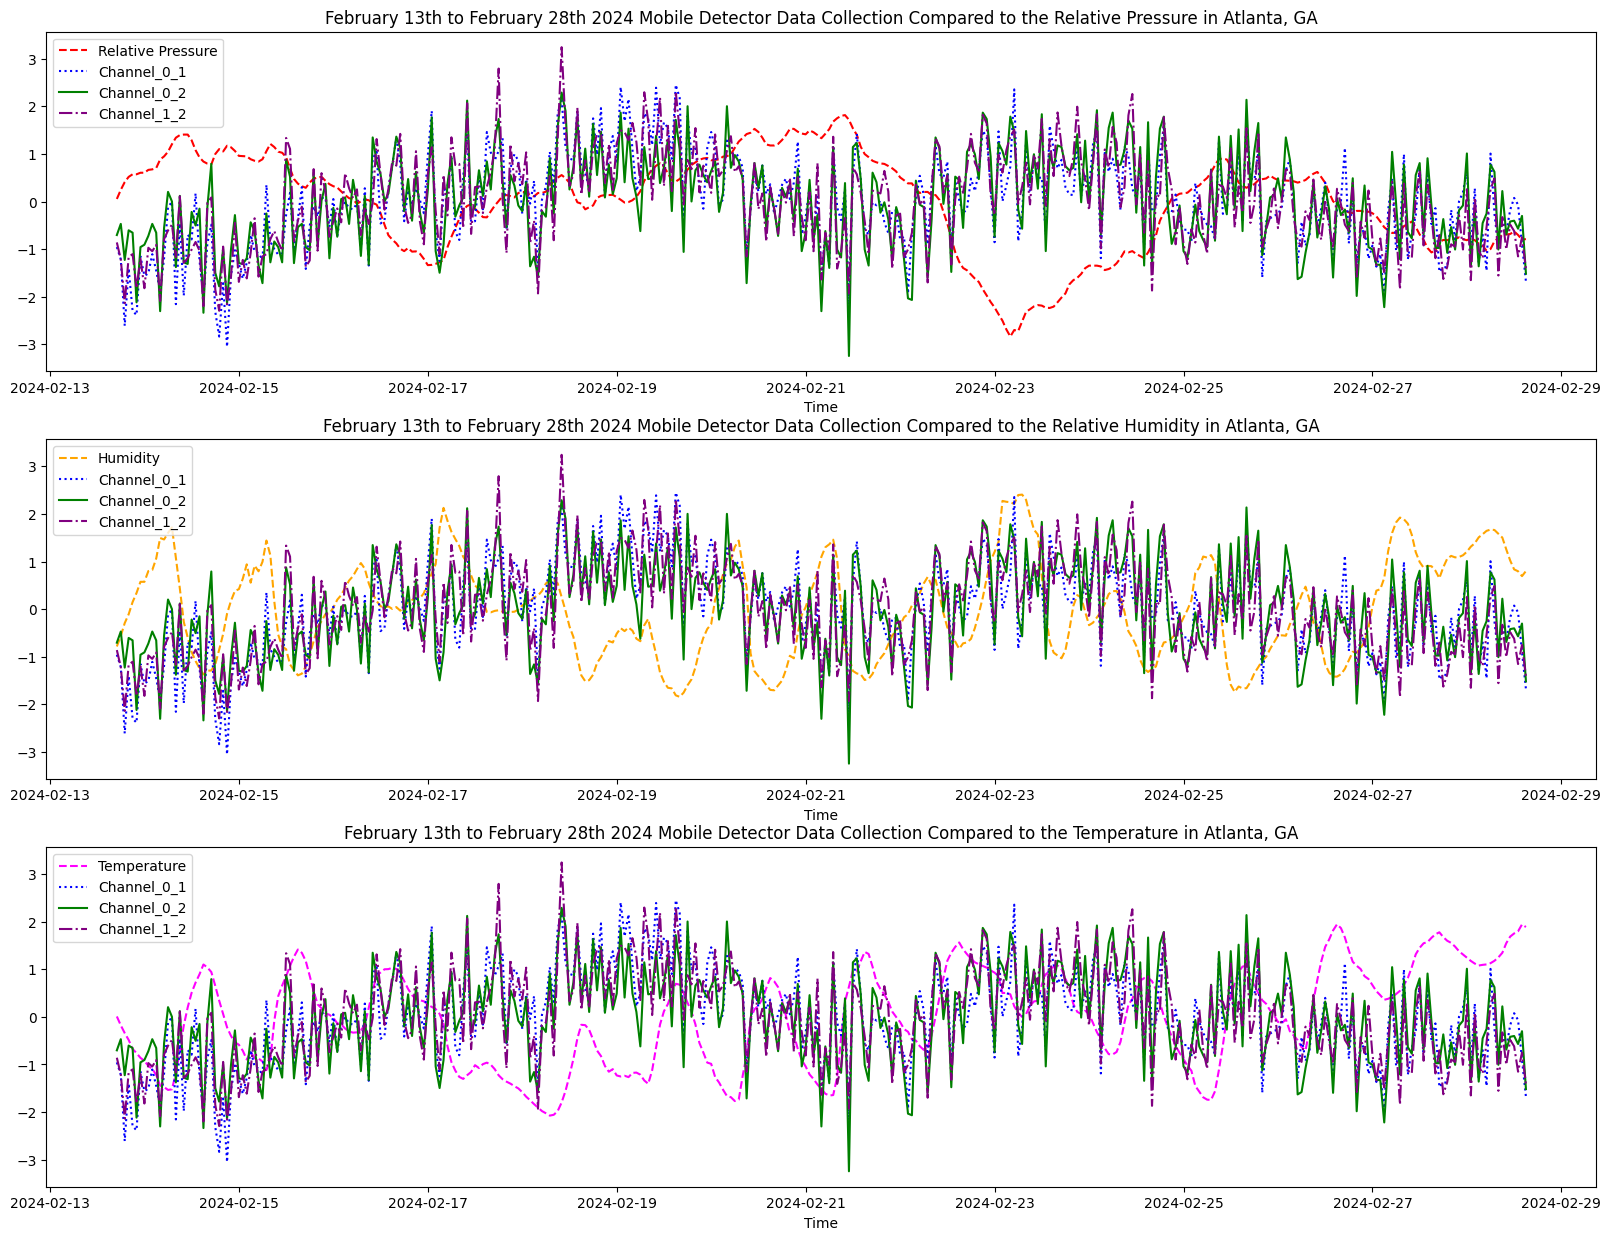

In [75]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))
ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#plot humidity on the second axis
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')

ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Relative Humidity in Atlanta, GA')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Temperature in Atlanta, GA')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [54]:
#import the countries data from the csv file with an index column of countries
df_ground= pd.read_csv("Rm415SA-Pi3crm001-E5-Oct5_2024_02_13_to_02_28.csv")
#timestamp column to datetime 
df_ground['timestamp'] = pd.to_datetime(df_ground['timestamp'])
# df_ground = df_ground.resample('H', on ='timestamp', axis=0).sum()
df_ground = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_ground.head()


Chan_0_1   Chan_0_2    Chan_1_2
timestamp                                             
2024-02-13 17:00:00  169.820513  82.666667  170.384615
2024-02-13 18:00:00  168.716667  83.633333  173.550000
2024-02-13 19:00:00  169.400000  82.483333  172.216667
2024-02-13 20:00:00  165.983333  81.650000  170.433333
2024-02-13 21:00:00  173.583333  85.150000  173.550000

In [55]:
#combined both datasets on the timestamp index
df_combined_g = pd.concat([df_ground, df_weather], axis=1, join='outer')
df_combined_g.dropna(inplace=True)
df_combined_g.head()

Chan_0_1   Chan_0_2    Chan_1_2  Outdoor_Temperature  \
timestamp                                                                     
2024-02-13 17:00:00  169.820513  82.666667  170.384615            52.700000   
2024-02-13 18:00:00  168.716667  83.633333  173.550000            50.666667   
2024-02-13 19:00:00  169.400000  82.483333  172.216667            48.891667   
2024-02-13 20:00:00  165.983333  81.650000  170.433333            47.325000   
2024-02-13 21:00:00  173.583333  85.150000  173.550000            45.250000   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-02-13 17:00:00    4.008333   4.858333            14.8      301.000000   
2024-02-13 18:00:00    2.150000   2.725000            14.8      289.916667   
2024-02-13 19:00:00    1.241667   1.566667            14.8      265.833333   
2024-02-13 20:00:00    0.333333   0.558333            14.8      242.500000   
2024-02-13 21:00:00    0.591667   0.916667            14.8      240.083333   

                     Hourly_Rain_(in/hr)  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                                       
2024-02-13 17:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 18:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 19:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 20:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 21:00:00                  0.0        0.00         0.0         3.11   

                     Monthly_Rain  Yearly_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                  
2024-02-13 17:00:00          3.72        77.51                 29.970833   
2024-02-13 18:00:00          3.72        77.51                 30.000000   
2024-02-13 19:00:00          3.72        77.51                 30.025000   
2024-02-13 20:00:00          3.72        77.51                 30.041667   
2024-02-13 21:00:00          3.72        77.51                 30.050000   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-02-13 17:00:00     37.750000                           0.0   
2024-02-13 18:00:00     41.916667                           0.0   
2024-02-13 19:00:00     47.000000                           0.0   
2024-02-13 20:00:00     50.500000                           0.0   
2024-02-13 21:00:00     55.333333                           0.0   

                     Solar_Radiation_(W/m^2)  Avg_Wind_Direction  \
timestamp                                                          
2024-02-13 17:00:00                15.341667           29.005833   
2024-02-13 18:00:00                 2.033333           29.033333   
2024-02-13 19:00:00                 0.000000           29.058333   
2024-02-13 20:00:00                 0.000000           29.072500   
2024-02-13 21:00:00                 0.000000           29.084167   

                     Absolute_Pressure_(inHg)  
timestamp                                      
2024-02-13 17:00:00                       1.0  
2024-02-13 18:00:00                       1.0  
2024-02-13 19:00:00                       1.0  
2024-02-13 20:00:00                       1.0  
2024-02-13 21:00:00                       1.0

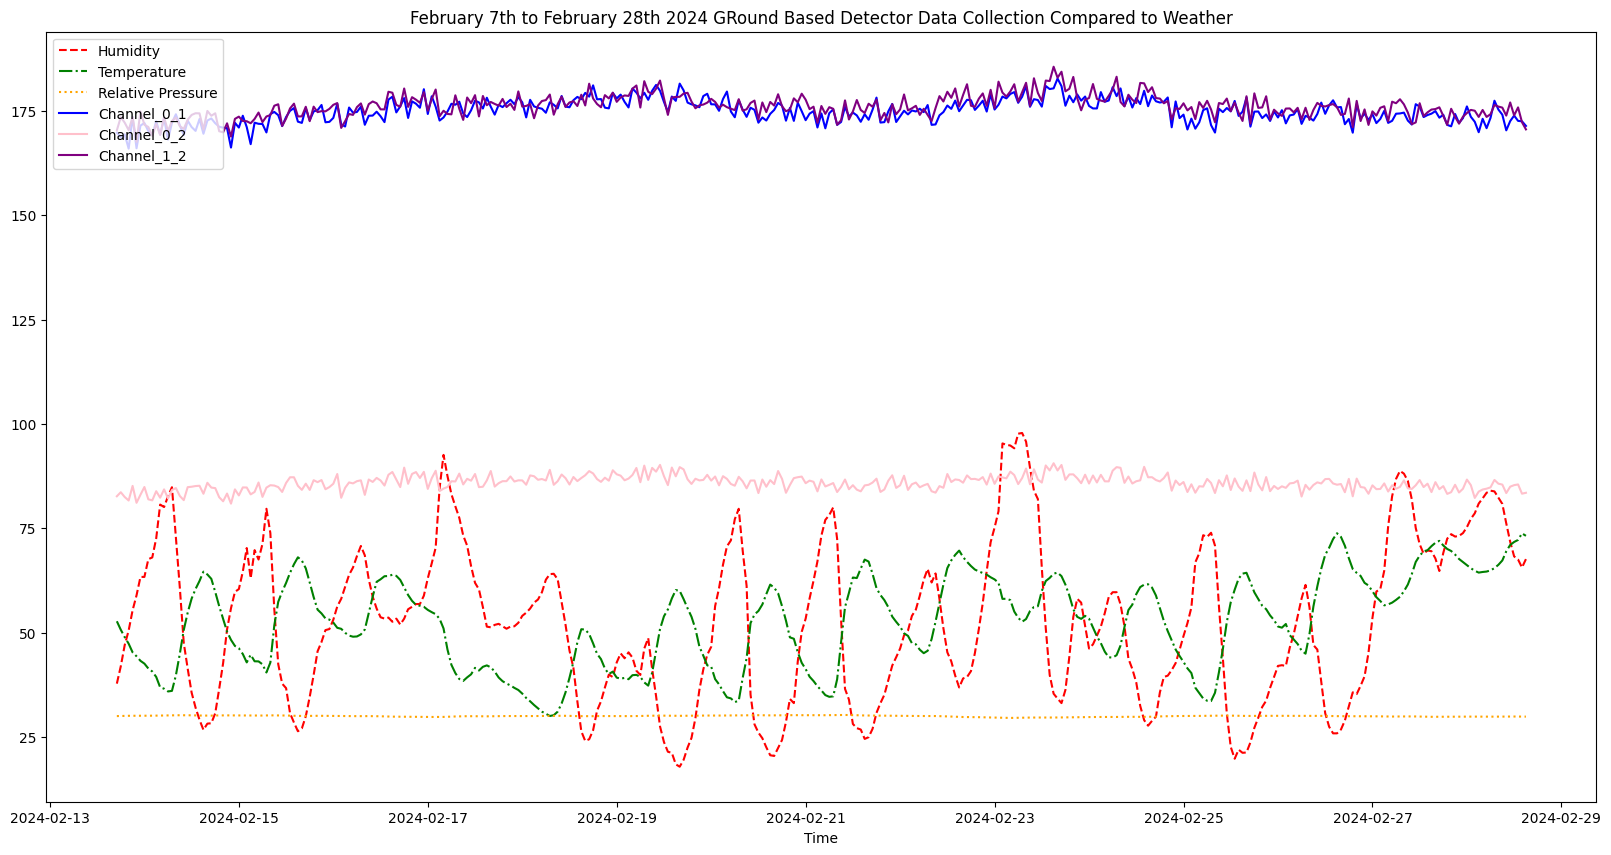

In [56]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined_g.index, df_combined_g['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined_g.index, df_combined_g['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined_g.index, df_combined_g['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined_g.index, df_combined_g['Chan_0_1'], color='blue', )
ax1.plot(df_combined_g.index, df_combined_g['Chan_0_2'], color='pink')
ax1.plot(df_combined_g.index, df_combined_g['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 28th 2024 GRound Based Detector Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [57]:
#make zero mean and unit variance
df_scaled_g_zmuv = df_combined_g.copy()
df_scaled_g_zmuv['Chan_0_1'] = (df_scaled_g_zmuv['Chan_0_1'] - df_scaled_g_zmuv['Chan_0_1'].mean()) / df_scaled_g_zmuv['Chan_0_1'].std()
df_scaled_g_zmuv['Chan_0_2'] = (df_scaled_g_zmuv['Chan_0_2'] - df_scaled_g_zmuv['Chan_0_2'].mean()) / df_scaled_g_zmuv['Chan_0_2'].std()
df_scaled_g_zmuv['Chan_1_2'] = (df_scaled_g_zmuv['Chan_1_2'] - df_scaled_g_zmuv['Chan_1_2'].mean()) / df_scaled_g_zmuv['Chan_1_2'].std()
df_scaled_g_zmuv['Humidity_(%)'] = (df_scaled_g_zmuv['Humidity_(%)'] - df_scaled_g_zmuv['Humidity_(%)'].mean()) / df_scaled_g_zmuv['Humidity_(%)'].std()
df_scaled_g_zmuv['Outdoor_Temperature'] = (df_scaled_g_zmuv['Outdoor_Temperature'] - df_scaled_g_zmuv['Outdoor_Temperature'].mean()) / df_scaled_g_zmuv['Outdoor_Temperature'].std()
df_scaled_g_zmuv['Relative_Pressure_(inHg)'] = (df_scaled_g_zmuv['Relative_Pressure_(inHg)'] - df_scaled_g_zmuv['Relative_Pressure_(inHg)'].mean()) / df_scaled_g_zmuv['Relative_Pressure_(inHg)'].std()
df_scaled_g_zmuv.head()

Chan_0_1  Chan_0_2  Chan_1_2  Outdoor_Temperature  \
timestamp                                                                
2024-02-13 17:00:00 -1.813073 -1.795935 -2.028089             0.007308   
2024-02-13 18:00:00 -2.200101 -1.250326 -0.901298            -0.179186   
2024-02-13 19:00:00 -1.960512 -1.899412 -1.375929            -0.341986   
2024-02-13 20:00:00 -3.158457 -2.369765 -2.010747            -0.485678   
2024-02-13 21:00:00 -0.493761 -0.394284 -0.901298            -0.675994   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-02-13 17:00:00    4.008333   4.858333            14.8      301.000000   
2024-02-13 18:00:00    2.150000   2.725000            14.8      289.916667   
2024-02-13 19:00:00    1.241667   1.566667            14.8      265.833333   
2024-02-13 20:00:00    0.333333   0.558333            14.8      242.500000   
2024-02-13 21:00:00    0.591667   0.916667            14.8      240.083333   

                     Hourly_Rain_(in/hr)  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                                       
2024-02-13 17:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 18:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 19:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 20:00:00                  0.0        3.11         0.0         3.11   
2024-02-13 21:00:00                  0.0        0.00         0.0         3.11   

                     Monthly_Rain  Yearly_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                  
2024-02-13 17:00:00          3.72        77.51                  0.053773   
2024-02-13 18:00:00          3.72        77.51                  0.244571   
2024-02-13 19:00:00          3.72        77.51                  0.408112   
2024-02-13 20:00:00          3.72        77.51                  0.517139   
2024-02-13 21:00:00          3.72        77.51                  0.571653   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-02-13 17:00:00     -0.783982                           0.0   
2024-02-13 18:00:00     -0.562773                           0.0   
2024-02-13 19:00:00     -0.292897                           0.0   
2024-02-13 20:00:00     -0.107081                           0.0   
2024-02-13 21:00:00      0.149521                           0.0   

                     Solar_Radiation_(W/m^2)  Avg_Wind_Direction  \
timestamp                                                          
2024-02-13 17:00:00                15.341667           29.005833   
2024-02-13 18:00:00                 2.033333           29.033333   
2024-02-13 19:00:00                 0.000000           29.058333   
2024-02-13 20:00:00                 0.000000           29.072500   
2024-02-13 21:00:00                 0.000000           29.084167   

                     Absolute_Pressure_(inHg)  
timestamp                                      
2024-02-13 17:00:00                       1.0  
2024-02-13 18:00:00                       1.0  
2024-02-13 19:00:00                       1.0  
2024-02-13 20:00:00                       1.0  
2024-02-13 21:00:00                       1.0

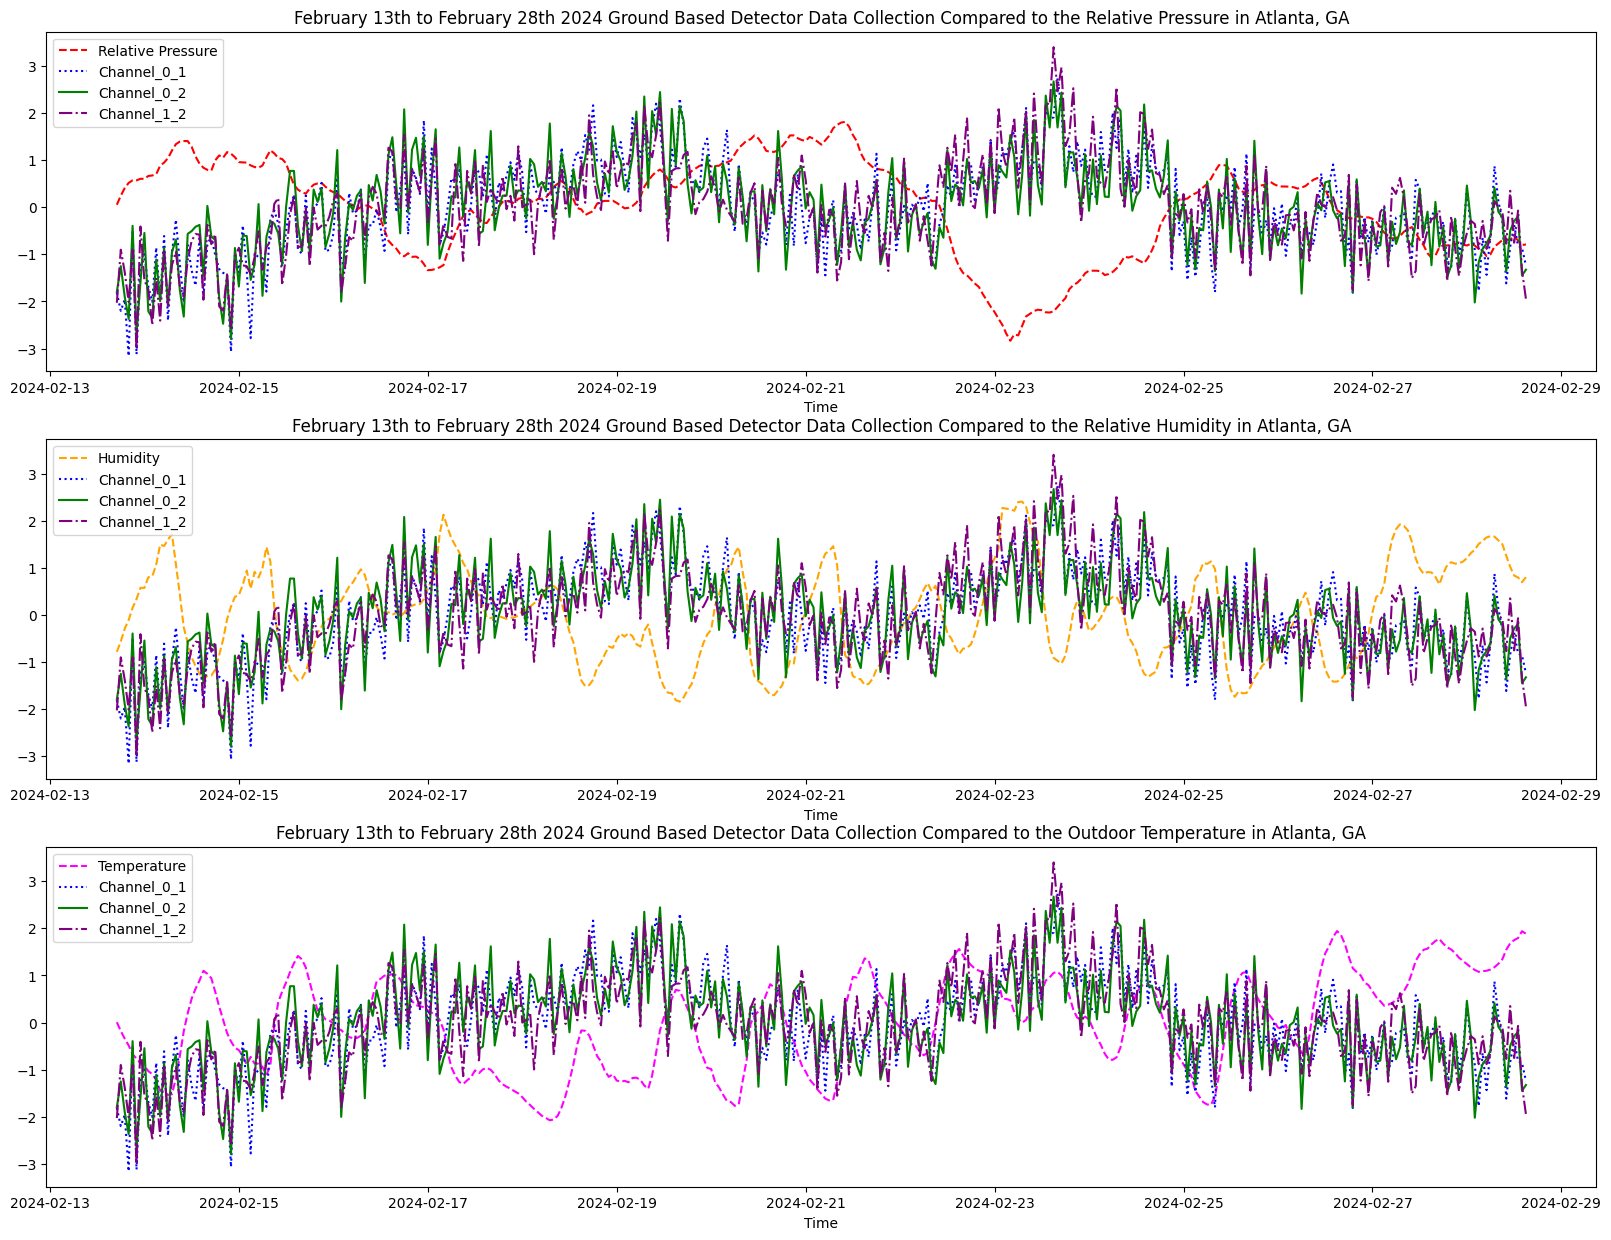

In [63]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))
ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax1.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#plot humidity on the second axis
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')

ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Relative Humidity in Atlanta, GA')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')

ax3.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')

ax3.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax3.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Outdoor Temperature in Atlanta, GA')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


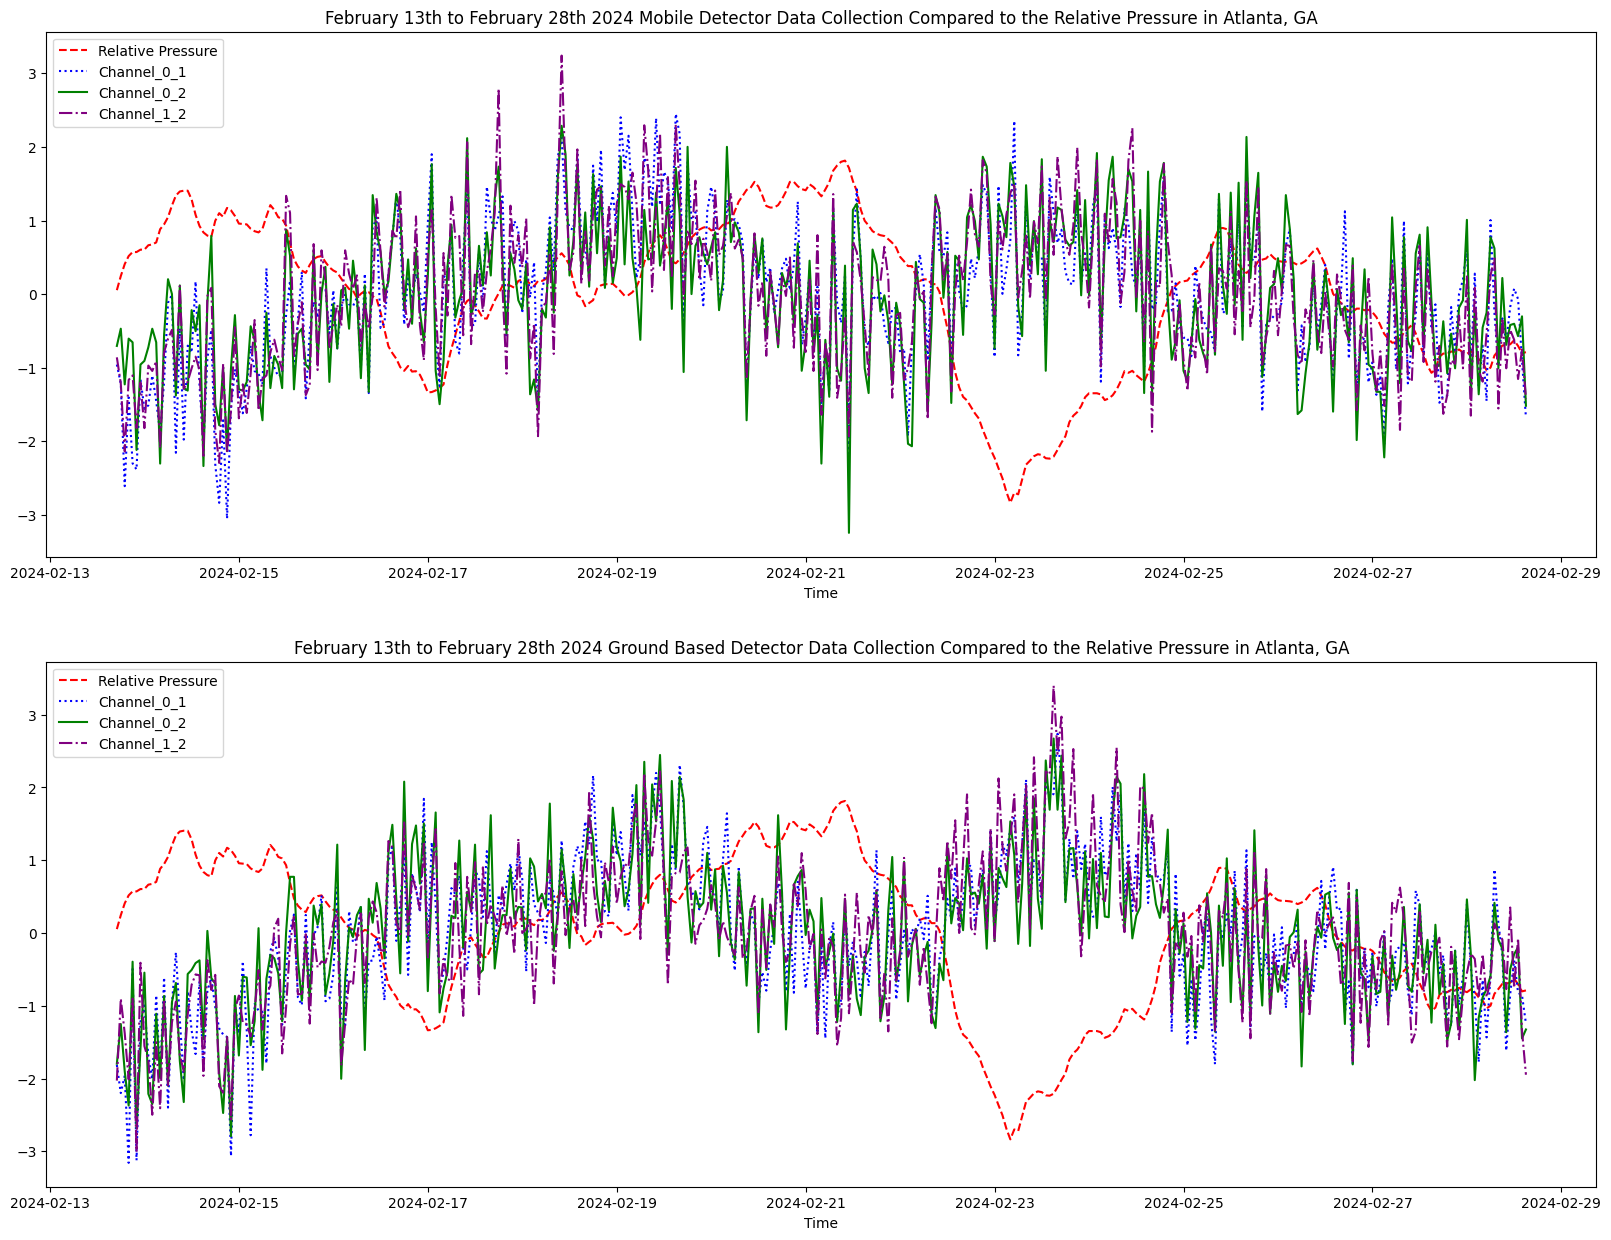

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


ax2.set_xlabel('Time')
#plot pressure on the fourth axis
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax2.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

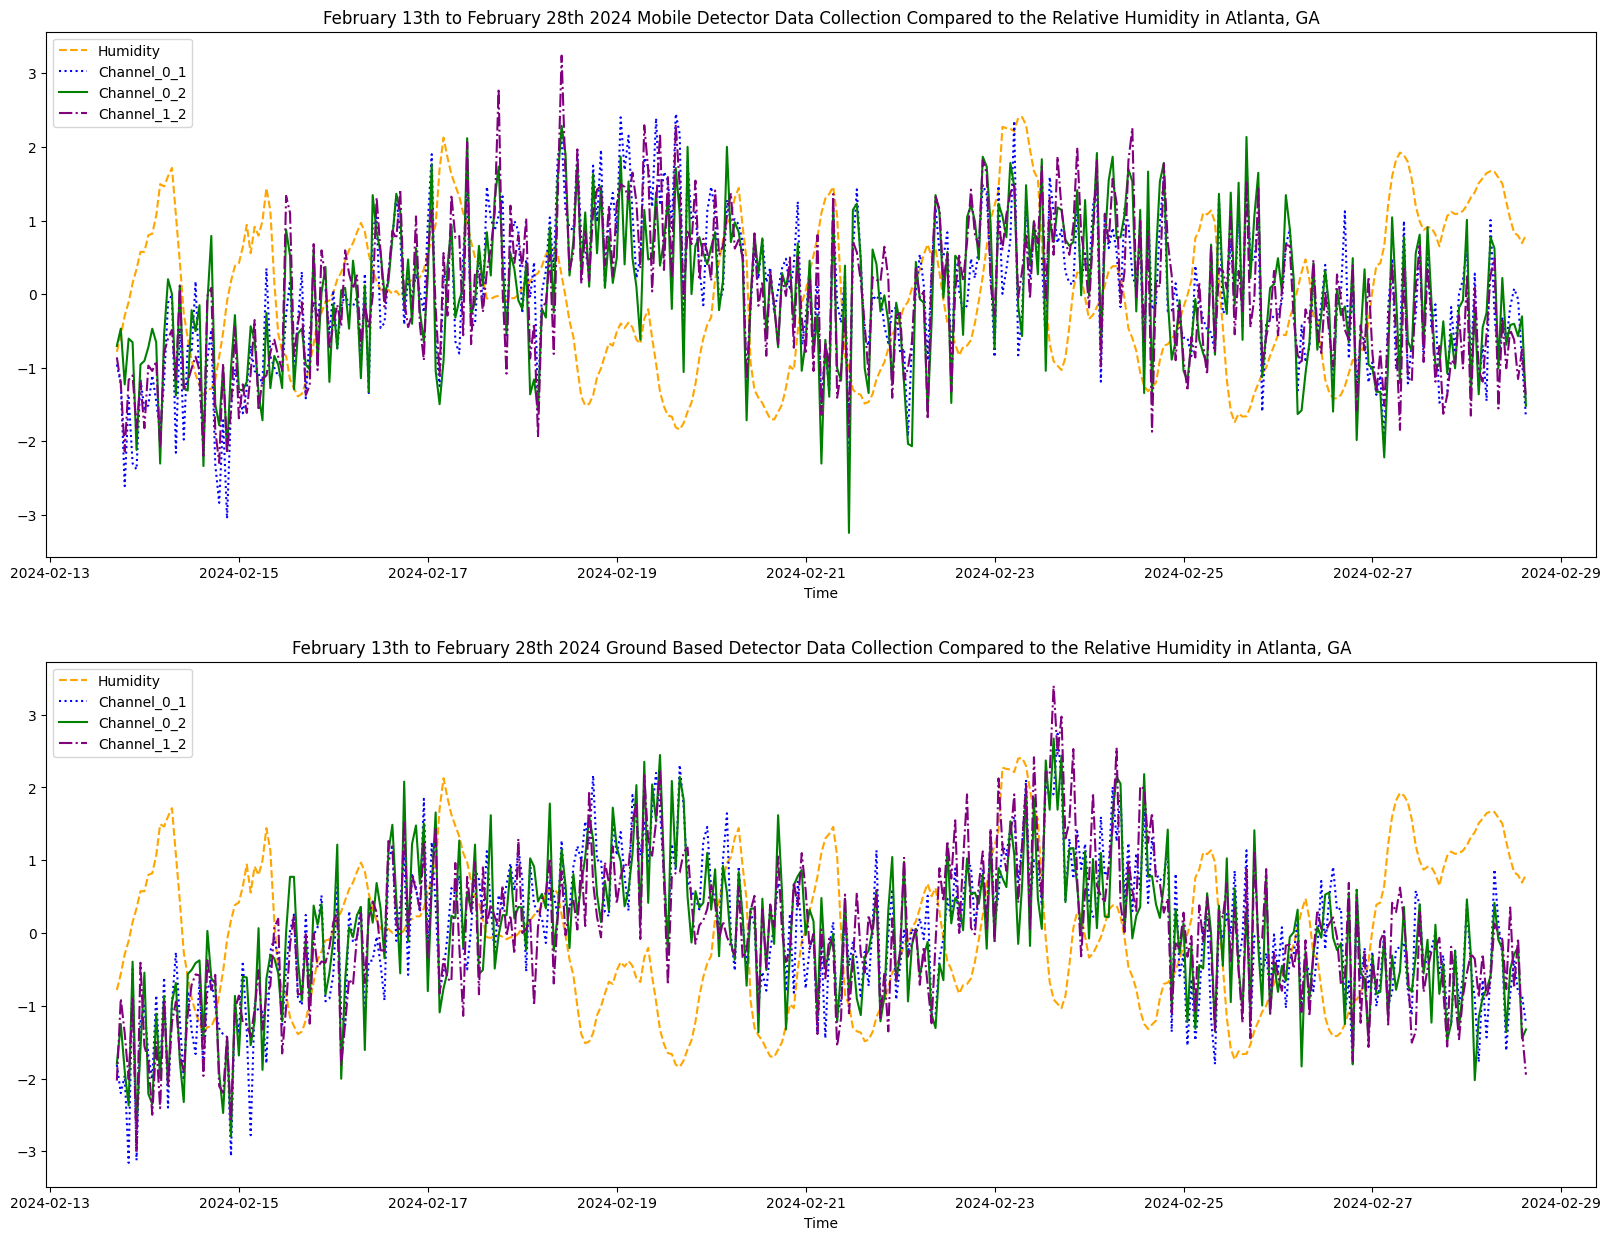

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Relative Humidity in Atlanta, GA')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


ax2.set_xlabel('Time')
#plot pressure on the fourth axis
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Relative Humidity in Atlanta, GA')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

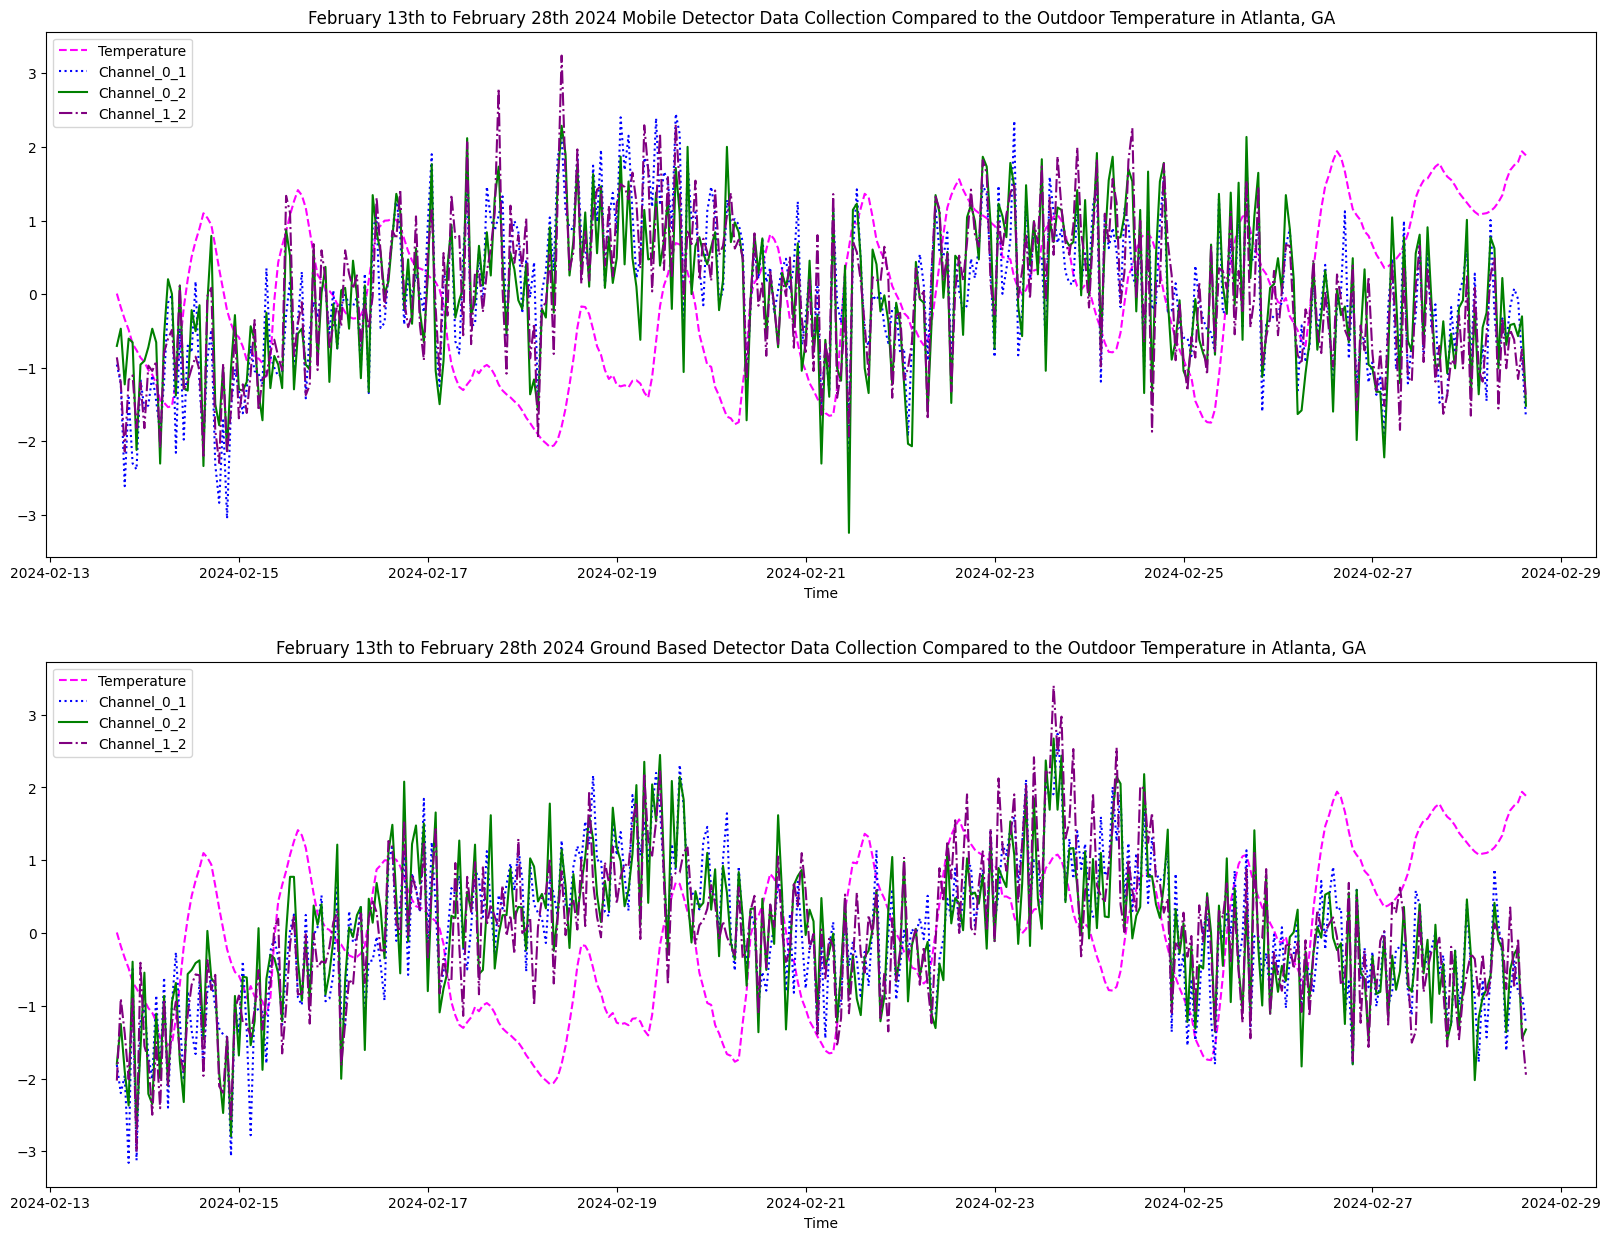

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('February 13th to February 28th 2024 Mobile Detector Data Collection Compared to the Outdoor Temperature in Atlanta, GA')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


ax2.set_xlabel('Time')
#plot pressure on the fourth axis
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_g_zmuv.index, df_scaled_g_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('February 13th to February 28th 2024 Ground Based Detector Data Collection Compared to the Outdoor Temperature in Atlanta, GA')
#set the legend
ax2.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')